In [12]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
#  load data 
DATA_PATH = r"F:\task\ev_charging_forecast\data\raw\karocharge_delhi_30day_realistic_synthetic_mixed_idle.csv"
df = pd.read_csv(DATA_PATH)

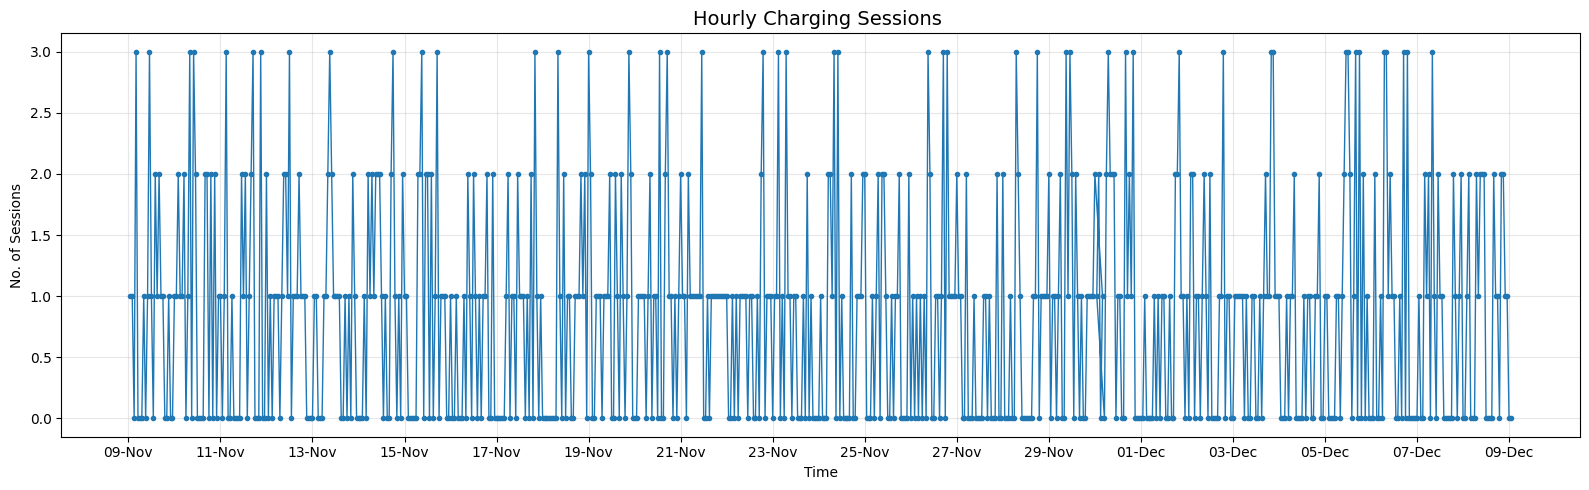

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(
    df.index,
    df["num_sessions"],
    linewidth=1,
    marker="o",
    markersize=3
)
plt.title("Hourly Charging Sessions ", fontsize=14)
plt.xlabel("Time")
plt.ylabel("No. of Sessions")
# better time formatting
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Zyada tar hours me 0 ya 1 session, kabhi-kabhi sudden spikes (2–3)
- no repeat pattern

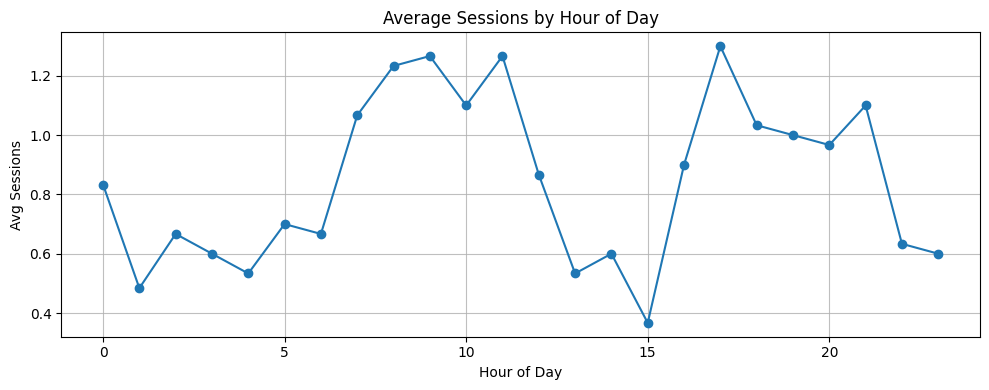

In [25]:
hourly_avg = df.groupby(df.index.hour)["num_sessions"].mean()

plt.figure(figsize=(10,4))
plt.plot(hourly_avg.index, hourly_avg.values, marker="o")
plt.title("Average Sessions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Sessions")
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()


- Morning (7–11) aur evening (17–21) me slightly higher demand
- Afternoon (13–15) me lowest usage

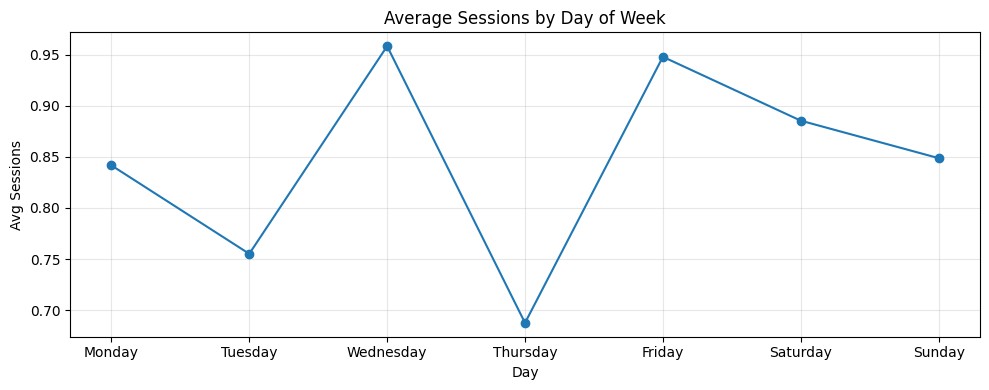

In [23]:
daily_avg = df.groupby(df.index.day_name())["num_sessions"].mean()
daily_avg = daily_avg.reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(10,4))
plt.plot(daily_avg.index, daily_avg.values, marker="o")
plt.title("Average Sessions by Day of Week")
plt.xlabel("Day")
plt.ylabel("Avg Sessions")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Wednesday & Friday thode higher
- Overall variation low → no strong weekly seasonality

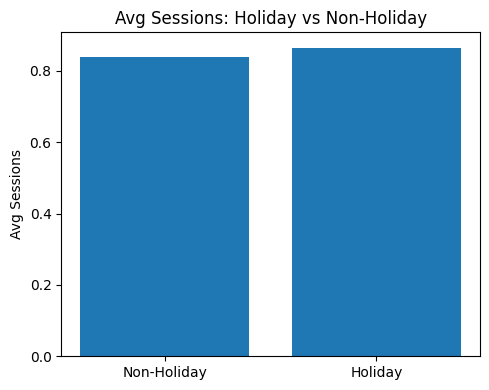

In [24]:
holiday_avg = df.groupby("is_holiday")["num_sessions"].mean()

plt.figure(figsize=(5,4))
plt.bar(["Non-Holiday","Holiday"], holiday_avg.values)
plt.title("Avg Sessions: Holiday vs Non-Holiday")
plt.ylabel("Avg Sessions")
plt.tight_layout()
plt.show()


- Holiday vs non-holiday average almost same
- Holiday flag weak predictor

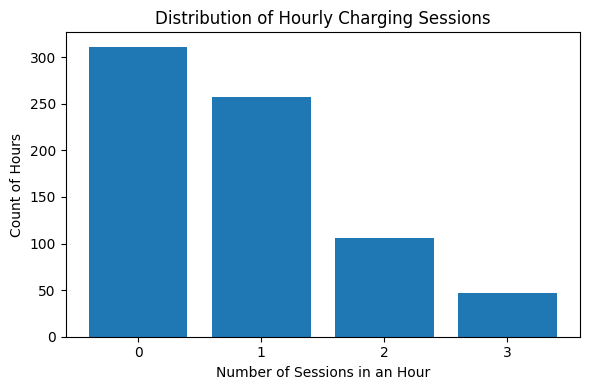

In [26]:
import matplotlib.pyplot as plt

counts = df["num_sessions"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Hourly Charging Sessions")
plt.xlabel("Number of Sessions in an Hour")
plt.ylabel("Count of Hours")
plt.tight_layout()
plt.show()


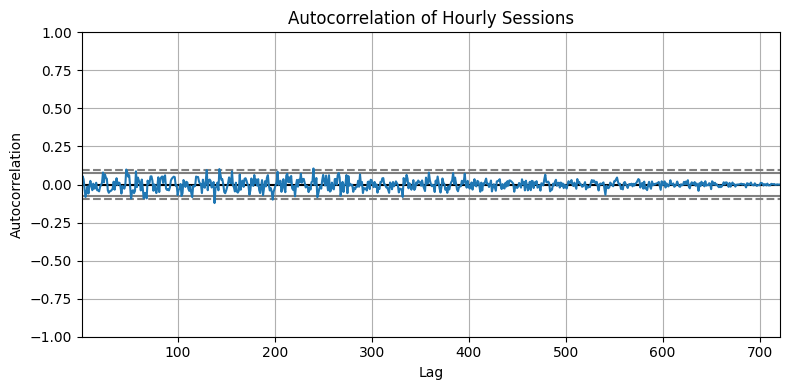

In [29]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(8,4))
autocorrelation_plot(df["num_sessions"])
plt.title("Autocorrelation of Hourly Sessions")
plt.tight_layout()
plt.show()


- station pe demand kaafi kam aur random hai, kyunki zyada tar time 0 ya 1 gaadi hi charge karti hai.